# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [84]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'Signs_data/train.p'
testing_file = 'Signs_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [85]:
import numpy as np
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1], X_train.shape[2]]

channels = X_train.shape[3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = sum(1 for line in open('signnames.csv')) - 1

print(y_train.shape)
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

(39209,)
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

----------------------------Training cases statistics--------------------------------



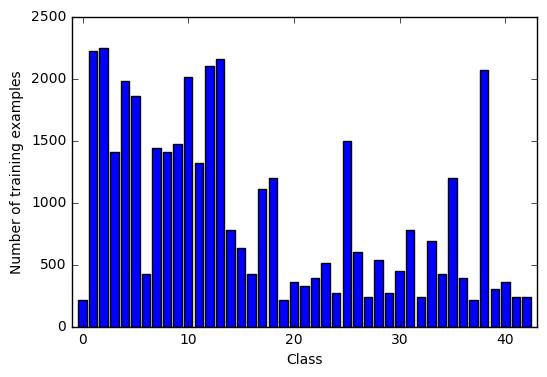

----------------------------Test cases statistics--------------------------------



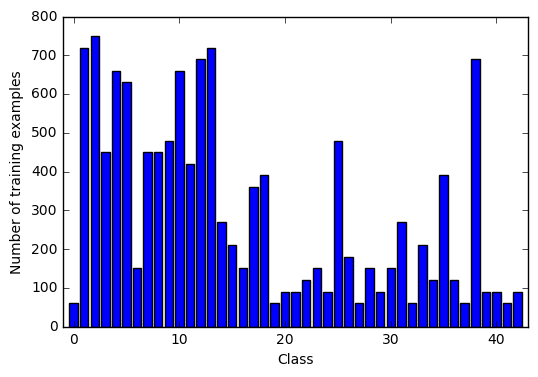

--------------------------------------------------------------------------------------

Class 0: Speed limit (20km/h)  210 samples


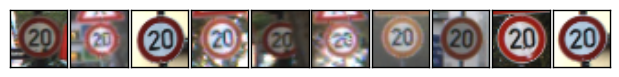

--------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)  2220 samples


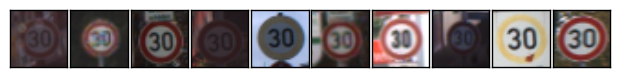

--------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)  2250 samples


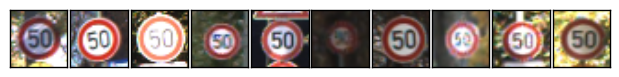

--------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)  1410 samples


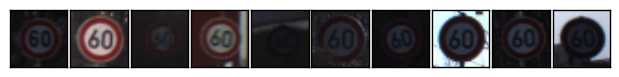

--------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)  1980 samples


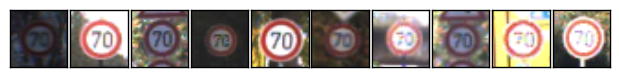

--------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)  1860 samples


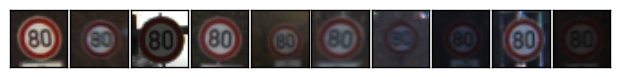

--------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)  420 samples


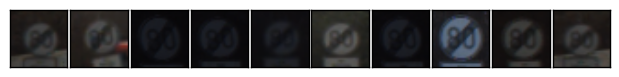

--------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)  1440 samples


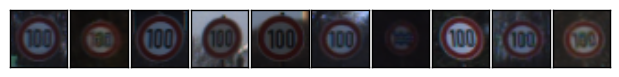

--------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)  1410 samples


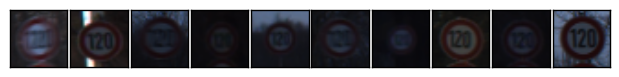

--------------------------------------------------------------------------------------

Class 9: No passing       1470 samples


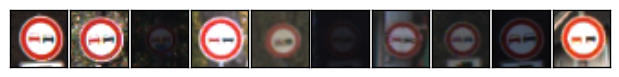

--------------------------------------------------------------------------------------

Class 10: No passing for vehicles over 3.5 metric tons  2010 samples


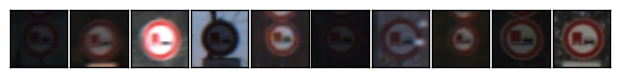

--------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection  1320 samples


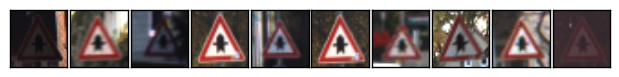

--------------------------------------------------------------------------------------

Class 12: Priority road    2100 samples


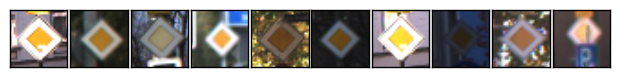

--------------------------------------------------------------------------------------

Class 13: Yield            2160 samples


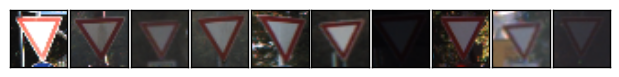

--------------------------------------------------------------------------------------

Class 14: Stop             780 samples


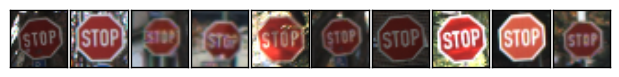

--------------------------------------------------------------------------------------

Class 15: No vehicles      630 samples


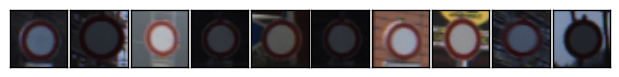

--------------------------------------------------------------------------------------

Class 16: Vehicles over 3.5 metric tons prohibited  420 samples


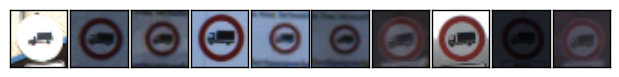

--------------------------------------------------------------------------------------

Class 17: No entry         1110 samples


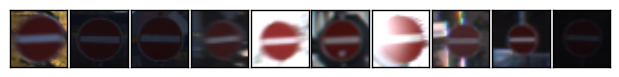

--------------------------------------------------------------------------------------

Class 18: General caution  1200 samples


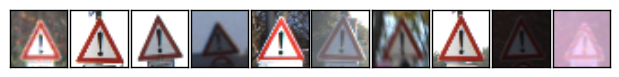

--------------------------------------------------------------------------------------

Class 19: Dangerous curve to the left  210 samples


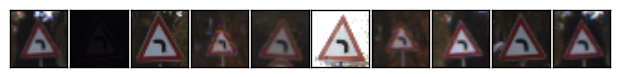

--------------------------------------------------------------------------------------

Class 20: Dangerous curve to the right  360 samples


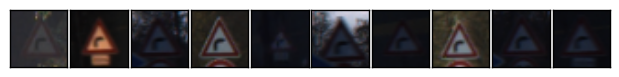

--------------------------------------------------------------------------------------

Class 21: Double curve     330 samples


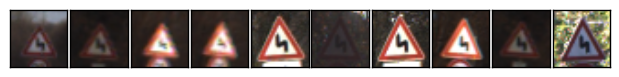

--------------------------------------------------------------------------------------

Class 22: Bumpy road       390 samples


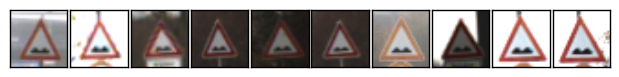

--------------------------------------------------------------------------------------

Class 23: Slippery road    510 samples


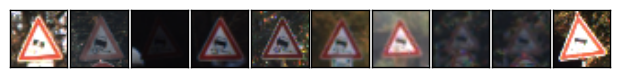

--------------------------------------------------------------------------------------

Class 24: Road narrows on the right  270 samples


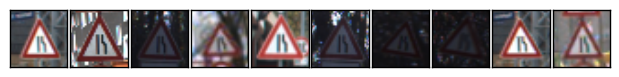

--------------------------------------------------------------------------------------

Class 25: Road work        1500 samples


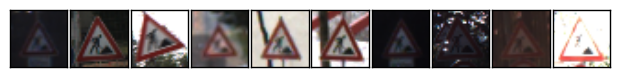

--------------------------------------------------------------------------------------

Class 26: Traffic signals  600 samples


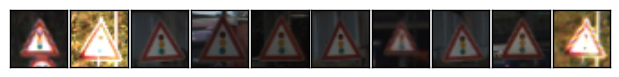

--------------------------------------------------------------------------------------

Class 27: Pedestrians      240 samples


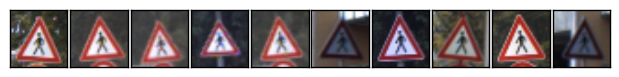

--------------------------------------------------------------------------------------

Class 28: Children crossing  540 samples


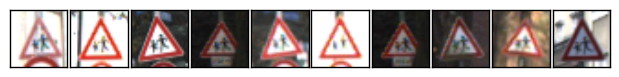

--------------------------------------------------------------------------------------

Class 29: Bicycles crossing  270 samples


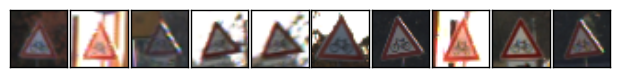

--------------------------------------------------------------------------------------

Class 30: Beware of ice/snow  450 samples


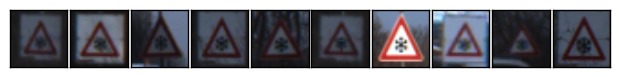

--------------------------------------------------------------------------------------

Class 31: Wild animals crossing  780 samples


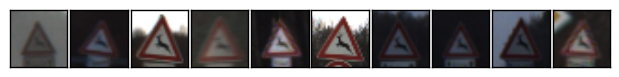

--------------------------------------------------------------------------------------

Class 32: End of all speed and passing limits  240 samples


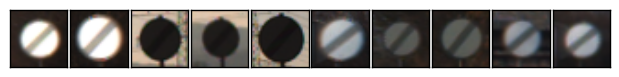

--------------------------------------------------------------------------------------

Class 33: Turn right ahead  689 samples


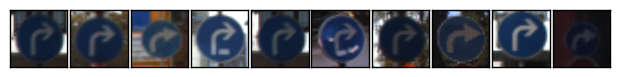

--------------------------------------------------------------------------------------

Class 34: Turn left ahead  420 samples


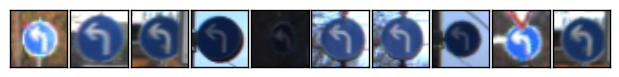

--------------------------------------------------------------------------------------

Class 35: Ahead only       1200 samples


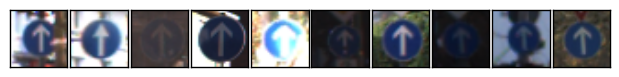

--------------------------------------------------------------------------------------

Class 36: Go straight or right  390 samples


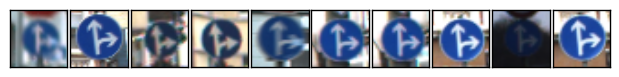

--------------------------------------------------------------------------------------

Class 37: Go straight or left  210 samples


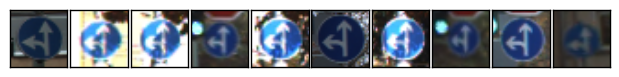

--------------------------------------------------------------------------------------

Class 38: Keep right       2070 samples


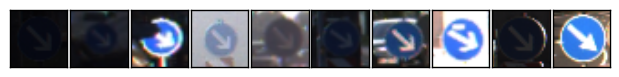

--------------------------------------------------------------------------------------

Class 39: Keep left        300 samples


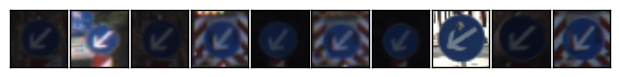

--------------------------------------------------------------------------------------

Class 40: Roundabout mandatory  360 samples


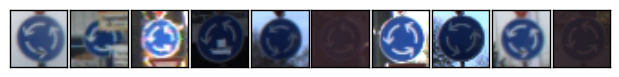

--------------------------------------------------------------------------------------

Class 41: End of no passing  240 samples


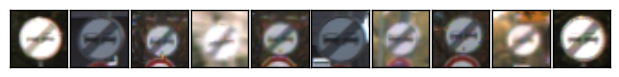

--------------------------------------------------------------------------------------

Class 42: End of no passing by vehicles over 3.5 metric tons  240 samples


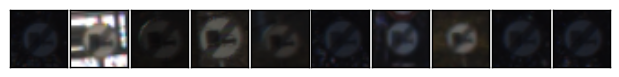

--------------------------------------------------------------------------------------



In [86]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
# Visualizations will be shown in the notebook.

%matplotlib inline

signnames = read_csv("signnames.csv").values[:, 1]
class_ids, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

print("----------------------------Training cases statistics--------------------------------\n")
plt.bar( np.arange( 43 ), class_counts, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()

test_class_ids, test_class_indices, test_class_counts = np.unique(y_test, return_index = True, return_counts = True)
print("----------------------------Test cases statistics--------------------------------\n")
plt.bar( np.arange( 43 ), test_class_counts, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()
print("--------------------------------------------------------------------------------------\n")

for class_id, class_index, class_count in zip(class_ids, class_indices, class_counts):
    print("Class %i: %-*s  %s samples" % (class_id, 15, signnames[class_id], str(class_count)))
    fig = plt.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(class_index, class_index + class_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    plt.show()
    print("--------------------------------------------------------------------------------------\n")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#Use Luma coding to convert images to grayscale
X_train=0.299 * X_train[:, :, :, 0] +0.587 * X_train[:, :, :, 1] + 0.114 * X_train[:, :, :, 2]
X_test=0.299 * X_test[:, :, :, 0] +0.587 * X_test[:, :, :, 1] + 0.114 * X_test[:, :, :, 2]

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.33)

X_validation = (X_validation - 128)/128
X_test = (X_test - 128)/128

In [5]:
print(X_train.shape)
print(y_train.shape)

(26270, 32, 32)
(26270,)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I did the following pre-processing:

1. Converted images to grayscale
2. Normalized the data to 0 mean and variance 1
3. Generated new images by shifting, rotating, rescaling and warping.

I converted the images to grayscale because the paper by Lecun referred above mentions that the convnet that get the 99.12 test accuracy ignored the color information. 

Normalizing the data to 0 mean and variance 1 is to ensure that the gradient descent optimization doesn't wander around.

I generated new images to make the classifier more robust. The generated training images prevents the classifier from overfitting.

The paper also mentions the local and global contrast normalization. I haven't tried doing those.

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

import scipy.misc
import scipy.ndimage
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform

def shift_image(image):
    #print(image.shape)
    row_shift = np.random.randint(-2, 2)
    col_shift = np.random.randint(-2, 2)
    shifted = scipy.ndimage.shift(image, (row_shift, col_shift), mode='constant')
    #print(shifted.shape)
    return shifted

def rotate_image(image):
    angle = np.random.uniform(-15, 15)
    rotated = scipy.ndimage.rotate(image, angle, reshape=False)
    return rotated

def rescale_image(image):
    scale = np.random.random() * .1 + .9
    rescaled = scipy.misc.imresize(image, scale)
    pad_rows = (image.shape[0] - rescaled.shape[0])
    pad_cols = image.shape[1] - rescaled.shape[1]
    rescaled = np.pad(rescaled, pad_width=((pad_rows, 0), (pad_cols, 0)), mode='constant',  constant_values=0)
    return rescaled

def warp_image(image):
    image_size = image.shape[1]

    d = image_size * 0.3
    
    tl_top = np.random.uniform(-d, d)     # Top left corner, top margin
    tl_left = np.random.uniform(-d, d)    # Top left corner, left margin
    bl_bottom = np.random.uniform(-d, d)  # Bottom left corner, bottom margin
    bl_left = np.random.uniform(-d, d)    # Bottom left corner, left margin
    tr_top = np.random.uniform(-d, d)     # Top right corner, top margin
    tr_right = np.random.uniform(-d, d)   # Top right corner, right margin
    br_bottom = np.random.uniform(-d, d)  # Bottom right corner, bottom margin
    br_right = np.random.uniform(-d, d)   # Bottom right corner, right margin

    transform = ProjectiveTransform()
    transform.estimate(np.array((
            (tl_left, tl_top),
            (bl_left, image_size - bl_bottom),
            (image_size - br_right, image_size - br_bottom),
            (image_size - tr_right, tr_top)
        )), np.array((
            (0, 0),
            (0, image_size),
            (image_size, image_size),
            (image_size, 0)
        )))
    
    warped = warp(image, transform, output_shape=image.shape, order = 1, mode = 'edge')
    return warped

def get_batch(X, y, num_train, batch_size):
    random_batch = np.random.randint(0, num_train-1, batch_size)
    Xb = X[random_batch, :, :]
    #print(Xb.shape)
        
    for i in np.random.choice(batch_size, int(batch_size/2), replace = False):        
        Xb[i] = shift_image(Xb[i])
        
    for i in np.random.choice(batch_size, int(batch_size/2), replace = False):        
        Xb[i] = rescale_image(Xb[i])
        
    for i in np.random.choice(batch_size, int(batch_size/2), replace = False):
        Xb[i] = rotate_image(Xb[i])
    
    for i in np.random.choice(batch_size, int(batch_size/2), replace = False):        
        Xb[i] = warp_image(Xb[i])
    
    Xb = (Xb - 128)/128
    Xb = Xb.reshape(Xb.shape + (1,)) 

    return (Xb, y[random_batch])

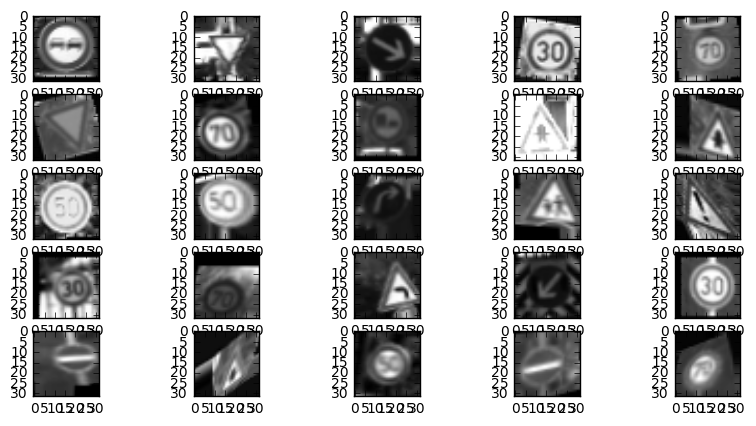

In [7]:
#%matplotlib inline

fig=plt.figure(figsize=(10,10))
num_rows = 5
num_cols = 5
(batch_x, batch_y) = get_batch(X_train, y_train, X_train.shape[0], 25)
batch_x = batch_x * 128 + 128
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        image = batch_x[index].squeeze()        
        sub = fig.add_subplot(2*num_rows, num_cols,  index+1)
        sub.imshow(image, cmap="gray")

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I used the scikit train/test split to split the training set into training and validation sets. I split one third of the data training set into validation. 

I generated new images by 

    - shifting - shifts the image by [-2, 2] pixels
    - rotating - rotates the image by [-15, 15] degrees
    - rescaling - rescales the image by [.9, 1] scaling ratio
    - warping - warps the image by projecting the corners to random point within 3 pixels

Generating new images to makes the classifier more robust. Because the capacity of the network is huge, having a small amount of data causes overfitting. The generated training images prevents the classifier from overfitting. Moreover, some of the training classes have very few images. Image generation helps with that as well.



In [20]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x, drop_probability, fc_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    conv_size = 5
    conv1_depth = 64
    conv2_depth = 128
    conv3_depth = 256
    
    with tf.variable_scope('conv_1', reuse=True):
        # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
        # lambda i, dtype, partition_info=None: tf.truncated_normal([38912, 512], stddev=0.1)
        conv1_W = tf.get_variable("weights", (conv_size, conv_size, 1, conv1_depth), 
                                  initializer=lambda i, dtype, partition_info=None: tf.truncated_normal(shape=(conv_size, conv_size, 1, conv1_depth), mean = mu, stddev = sigma))
        conv1_b = tf.get_variable("bias", (conv1_depth, ), 
                                  initializer=lambda i, dtype, partition_info=None: tf.zeros(conv1_depth))
        
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
        # Activation.
        conv1 = tf.nn.relu(conv1)
        conv1 = tf.nn.dropout(conv1, drop_probability)
    
    with tf.variable_scope('pool_1'):
        # Pooling. Input = 28x28x6. Output = 14x14x6.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    with tf.variable_scope('conv_2', reuse=True):
        # Layer 2: Convolutional. Output = 10x10x16.
        conv2_W = tf.get_variable("weights", (conv_size, conv_size, conv1_depth, conv2_depth), 
                                  initializer=lambda i, dtype, partition_info=None: tf.truncated_normal(shape=(conv_size, conv_size, conv1_depth, conv2_depth), mean = mu, stddev = sigma))
        conv2_b = tf.get_variable("bias", (conv2_depth, ), 
                                  initializer=lambda i, dtype, partition_info=None: tf.zeros(conv2_depth))
        
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

        # Activation.
        conv2 = tf.nn.relu(conv2)
        conv2 = tf.nn.dropout(conv2, drop_probability)

    with tf.variable_scope('pool_2'):
        # Pooling. Input = 10x10x16. Output = 5x5x16.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    with tf.variable_scope('conv_3', reuse=True):
        # Layer 3: Convolutional. Output = 1x1x16.
        conv3_W = tf.get_variable("weights", (conv_size, conv_size, conv2_depth, conv3_depth), 
                                  initializer=lambda i, dtype, partition_info=None: tf.truncated_normal(shape=(conv_size, conv_size, conv2_depth, conv3_depth), mean = mu, stddev = sigma))
        conv3_b = tf.get_variable("bias", (conv3_depth, ), 
                                  initializer=lambda i, dtype, partition_info=None: tf.zeros(conv3_depth))

        conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

        # Activation.
        conv3 = tf.nn.relu(conv3)
        conv3 = tf.nn.dropout(conv3, drop_probability)
    

    # Flatten. Input = 5x5x16. Output = 400.
    flat_size = 1 * 1 * conv3_depth
    fc0   = flatten(conv3)
    
    with tf.variable_scope('fc_1', reuse=True):
        # Layer 3: Fully Connected. Input = 400. Output = 120.
        fc1_W = tf.get_variable("weights", (flat_size, 1024), 
                                  initializer=lambda i, dtype, partition_info=None: tf.truncated_normal(shape=(flat_size, 1024), mean = mu, stddev = sigma))
        fc1_b = tf.get_variable("bias", (1024, ), 
                                  initializer=lambda i, dtype, partition_info=None: tf.zeros(1024))

        fc1   = tf.matmul(fc0, fc1_W) + fc1_b

        # Activation.
        fc1    = tf.nn.relu(fc1)
        fc1 = tf.nn.dropout(fc1, fc_prob)

    with tf.variable_scope('fc_2', reuse=True):
        # Fully Connected. Input = 1024. Output = 1024.
        fc2_W = tf.get_variable("weights", (1024, 1024), 
                                  initializer=lambda i, dtype, partition_info=None: tf.truncated_normal(shape=(1024, 1024), mean = mu, stddev = sigma))
        fc2_b = tf.get_variable("bias", (1024, ), 
                                  initializer=lambda i, dtype, partition_info=None: tf.zeros(1024))

        fc2    = tf.matmul(fc1, fc2_W) + fc2_b

        # Activation.
        fc2    = tf.nn.relu(fc2)
        fc2 = tf.nn.dropout(fc2, fc_prob)
    
    with tf.variable_scope('fc_3', reuse=True):
        # Layer 5: Fully Connected. Input = 84. Output = 43.
        fc3_W = tf.get_variable("weights", (1024, n_classes), 
                                  initializer=lambda i, dtype, partition_info=None: tf.truncated_normal(shape=(1024, n_classes), mean = mu, stddev = sigma))
        fc3_b = tf.get_variable("bias", (n_classes, ), 
                                  initializer=lambda i, dtype, partition_info=None: tf.zeros(n_classes))

        logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture is as follows:

    - Input
    - 5x5x64 Convolution + RELU + Dropout
    - 2x2 MaxPool
    - 5x5x128  Convolution + RELU + Dropout
    - 2x2 MaxPool
    - 5x5x256  Convolution + RELU + Dropout
    - 1024 FullyConnected + RELU
    - 1024 FullyConnected + RELU
    - Softmax
    

In [ ]:
import os
### Train your model here.
### Feel free to use as many code cells as needed.
EPOCHS = 500
BATCH_SIZE = 256

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
drop_probability = tf.placeholder(tf.float32)
fc_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, n_classes)

current_epoch = tf.Variable(0, trainable=False)
start_rate = 0.0001
learning_rate = tf.train.exponential_decay(start_rate, current_epoch, decay_steps = 100, decay_rate = 0.1)
l2_lambda = 0.0001

logits = LeNet(x, drop_probability, fc_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
fc1_l2_loss = 0
with tf.variable_scope('fc_1', reuse = True):
    fc1_l2_loss = tf.nn.l2_loss(tf.get_variable('weights'))
fc2_l2_loss = 0
with tf.variable_scope('fc_2', reuse = True):
    fc2_l2_loss = tf.nn.l2_loss(tf.get_variable('weights'))
fc3_l2_loss = 0
with tf.variable_scope('fc_3', reuse = True):
    fc3_l2_loss = tf.nn.l2_loss(tf.get_variable('weights'))
    
loss_operation = tf.reduce_mean(cross_entropy) + l2_lambda * (fc1_l2_loss + fc2_l2_loss + fc3_l2_loss)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)
predictions = tf.nn.softmax(logits)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, prob=1.0, fc_prob_val=1.0):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    batch_losses = []
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        batch_x = batch_x.reshape(batch_x.shape + (1,)) 
        [accuracy, batch_loss] = sess.run([accuracy_operation, cross_entropy], feed_dict={x: batch_x, y: batch_y, 
                                                           drop_probability:prob,fc_prob: fc_prob_val})
        total_accuracy += (accuracy * len(batch_x))
        batch_losses.extend(batch_loss)
    loss = np.mean(batch_losses)
    return [total_accuracy / num_examples, loss]

num_examples = len(X_train)
batches_per_epoch = num_examples // BATCH_SIZE

with tf.Session() as sess:
    current_epoch = i // batches_per_epoch
    sess.run(tf.initialize_all_variables())
    prob = 0.8
    fc_prob_val = 0.5
    best_loss_epoch = 0
    best_loss_value = 1000
    
    print("Training...")
    print()
    for i in range(EPOCHS * batches_per_epoch):
        (batch_x, batch_y) = get_batch(X_train, y_train, num_examples, BATCH_SIZE)
        output = sess.run([training_operation], 
                            feed_dict={x: batch_x, y: batch_y,drop_probability: prob,
                                                            fc_prob: fc_prob_val})

        if (i >0 and i % batches_per_epoch == 0):
            [validation_accuracy, validation_loss] = evaluate(X_validation, y_validation, 1.0, 1.0)
            print("EPOCH {} ...".format(i // batches_per_epoch))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print("Validation Loss = {:.3f}".format(validation_loss))
            print ("Best validation loss = {:.3f}".format(best_loss_value))
            print()
            if validation_loss < best_loss_value:
                best_loss_value = validation_loss
                best_loss_epoch = i // batches_per_epoch
                best_ = saver.save(sess, os.getcwd() + "/early_stopping_checkpoint_c64_c128_c256_f1024_f1024_r0001")
        
    saver.save(sess, 'lenet')
    print("Model saved")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Validation Accuracy = 0.069
Validation Loss = 3.718
Best validation loss = 1000.000

EPOCH 2 ...
Validation Accuracy = 0.061
Validation Loss = 3.697
Best validation loss = 3.718

EPOCH 3 ...
Validation Accuracy = 0.059
Validation Loss = 3.649
Best validation loss = 3.697

EPOCH 4 ...
Validation Accuracy = 0.058
Validation Loss = 3.601
Best validation loss = 3.649

EPOCH 5 ...
Validation Accuracy = 0.061
Validation Loss = 3.561
Best validation loss = 3.601

EPOCH 6 ...
Validation Accuracy = 0.063
Validation Loss = 3.528
Best validation loss = 3.561

EPOCH 7 ...
Validation Accuracy = 0.068
Validation Loss = 3.499
Best validation loss = 3.528

EPOCH 8 ...
Validation Accuracy = 0.070
Validation Loss = 3.482
Best validation loss = 3.499

EPOCH 9 ...
Validation Accuracy = 0.074
Validation Loss = 3.464
Best validation loss = 3.482

EPOCH 10 ...
Validation Accuracy = 0.081
Validation Loss = 3.452

In [24]:
print ("Best validation loss = {:.5f}".format(best_loss_value))
print ("Best validation epoch = {:.3f}".format(best_loss_epoch))

Best validation loss = 0.00496
Best validation epoch = 490.000


In [50]:
with tf.Session() as sess:
    saver.restore(sess, os.getcwd() + "/early_stopping_checkpoint_c64_c128_c256_f1024_f1024_r0001")
    [test_accuracy, test_loss] = evaluate(X_test, y_test, 1.0, 1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.973


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I used the following parameters to train the model

    - ADAM optimizer since it was highly recommended in Andrej Karpathy's CS231n course
    - Batch size of 256
    - 500 epochs with early termination
    - Dropout probability of .8 for the convolutions
    - Dropout probability of .5 for the fully connected layers
    - Exponential decay training rate with the starting rate at .0001 dropping by .1 every 100 epochs.
    - L2 regularization with lambda as .0001

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
This was the process I went through:

    1. I started with the LeNet architecture without pre-processing the images. The test accuracy was only in the late 70s and early 80s.
    2. Then I modified the LeNet network to add one more convolution. Still the accuracy did not go above 82%.
    3. Then I tried changing the size of the convolution to 3x3. This didn't help either
    4. Then I added dropouts for the convolutions and the fully connected layers. This didn't help either
    5. Finally I decided to generate more inputs. Per suggestions in the paper I added shifts, rotations and rescales. This helped quite a bit. But the fully connected layer size seemed to be a problem.
    6. I increased the size of the fully connected layer to 1024. This immediately bumped the accuracy to 98% range.
    7. Then I changed the learning rate to exponential decay since the loss seemed to not decrease significantly after 100 iterations
    8. I introduced early stopping to get the network with the best loss
    
Some of the things that I'm going to try are
    1. Try global and local contrast optimization like mentioned in the paper.
    2. I would have loved to do a hyper parameter search similar to what I did in the CS231n class. But because of lack of knowledge in TensorFlow, I chose to do it more manually. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

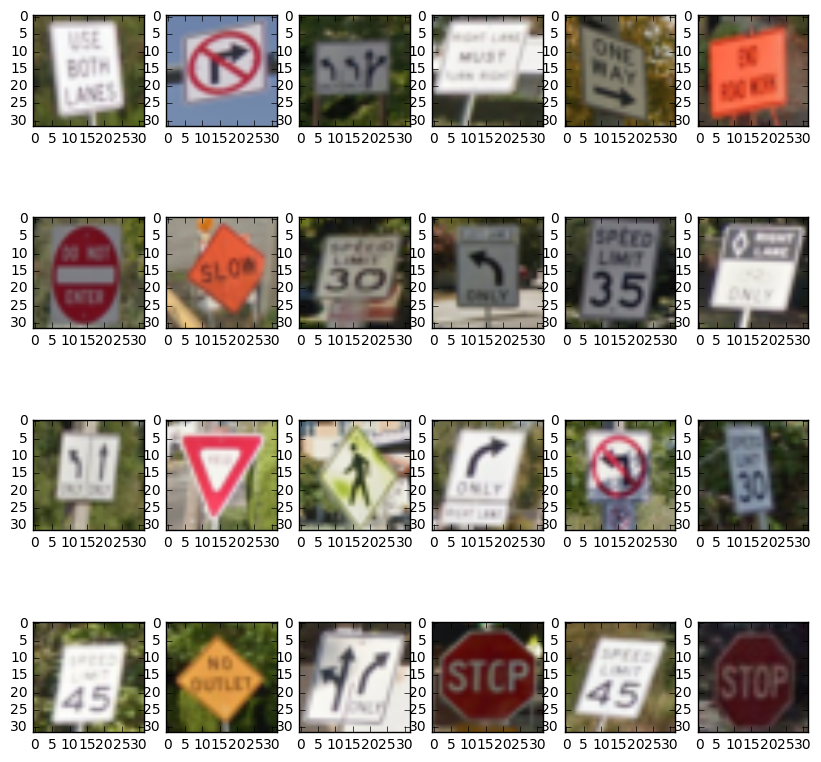

In [87]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
import scipy.misc
import numpy as np
from os import listdir
from os.path import isfile, join
%matplotlib inline

path = 'examples/'
files = [f for f in listdir(path) if isfile(join(path, f))]

exampleimages = None
for file in files:
    image = imread(path + file)
    image = scipy.misc.imresize(image, (32,32))
    if exampleimages is None:
        exampleimages = [image]
    else:
        exampleimages = np.vstack((exampleimages, [image]))

fig=plt.figure(figsize=(10,10))

for i in range(exampleimages.shape[0]):
    sub = fig.add_subplot(4,6,i+1)
    sub.imshow(exampleimages[i], aspect='equal')

orignalexamples = exampleimages
exampleimages = rgb2gray(exampleimages)
exampleimages = exampleimages.reshape(exampleimages.shape + (1,))
exampleimages = (exampleimages - 128) / 128
exampleimages = exampleimages.astype(np.float32, copy=False)

In [57]:
print(exampleimages.shape)

(24, 32, 32, 1)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I expect the stop signs to be recognized correctly. And probably the speed limit signs might also be recognized correctly as the neural network might have learnt to recognize the numbers. But there are signs that are not found in the training data at all. For example, the 'no outlet' sign or the signs showing multiple lane directions. These could confuse the network.

The image quality is also not as good as the training data.

In [62]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
def get_top_k_predictions(X, prob=1.0, fc_prob_val=1.0):
    examples_predictions = tf.nn.softmax(logits)
    top_k_predictions = tf.nn.top_k(examples_predictions, 5)
    with tf.Session() as sess:
        saver.restore(sess, os.getcwd() + "/early_stopping_checkpoint_c64_c128_c256_f1024_f1024_r0001")
        [p] = sess.run([top_k_predictions], feed_dict={x: exampleimages, drop_probability:prob,fc_prob: fc_prob_val})
        return np.array(p)

In [63]:
examples_predictions = get_top_k_predictions(exampleimages, 1.0, 1.0)

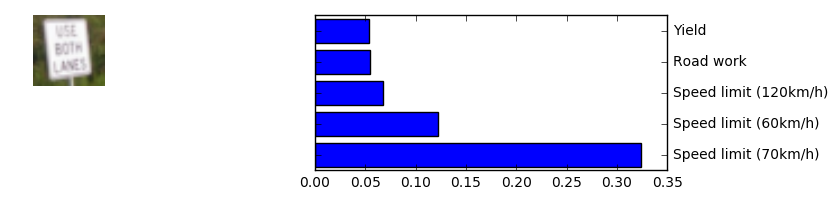

---------------------------------------------------------------------------------------------------



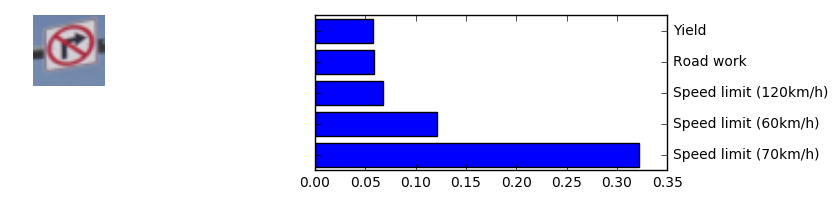

---------------------------------------------------------------------------------------------------



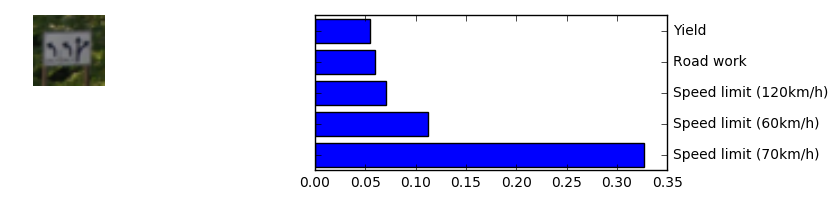

---------------------------------------------------------------------------------------------------



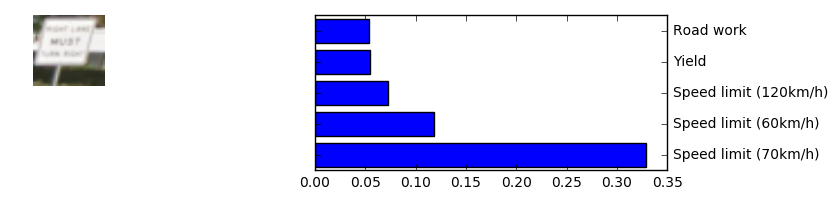

---------------------------------------------------------------------------------------------------



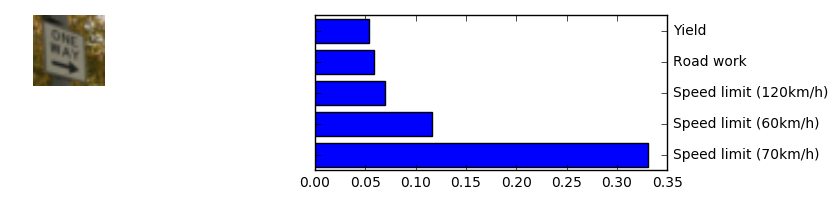

---------------------------------------------------------------------------------------------------



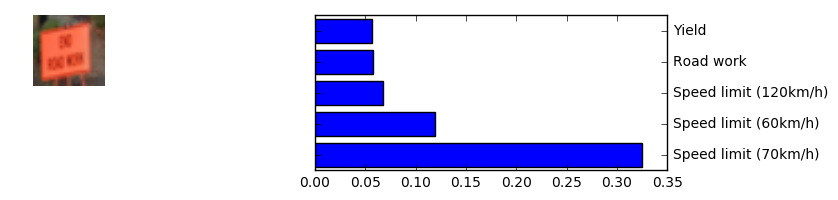

---------------------------------------------------------------------------------------------------



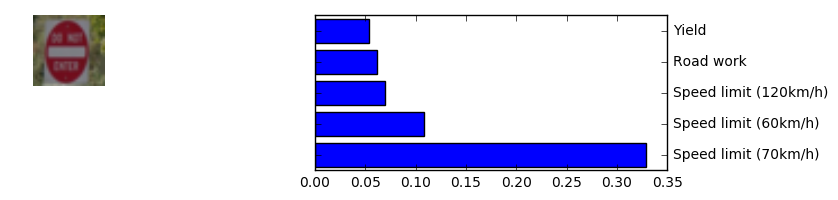

---------------------------------------------------------------------------------------------------



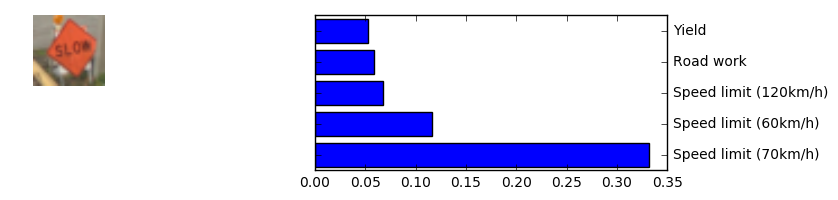

---------------------------------------------------------------------------------------------------



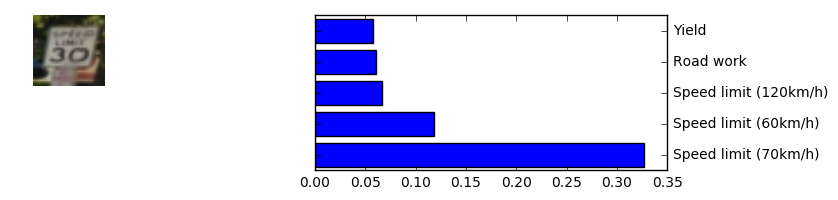

---------------------------------------------------------------------------------------------------



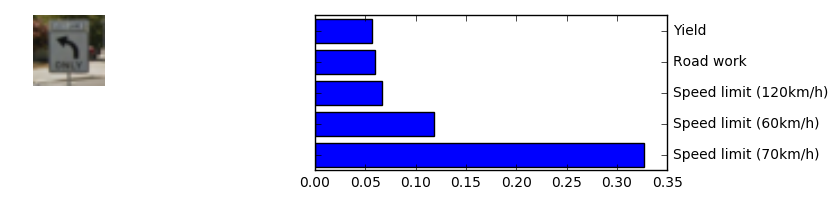

---------------------------------------------------------------------------------------------------



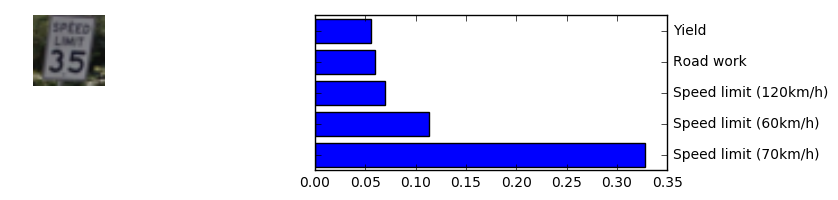

---------------------------------------------------------------------------------------------------



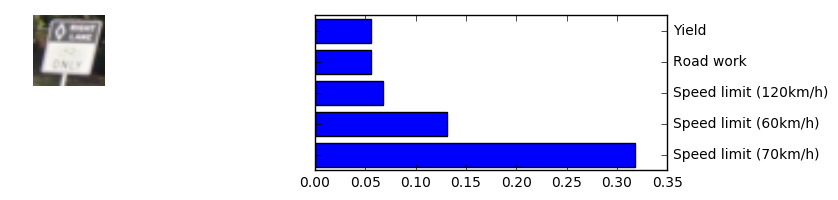

---------------------------------------------------------------------------------------------------



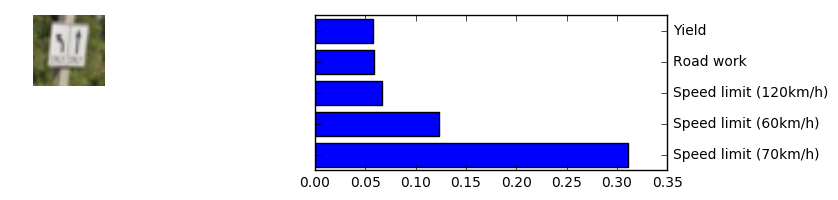

---------------------------------------------------------------------------------------------------



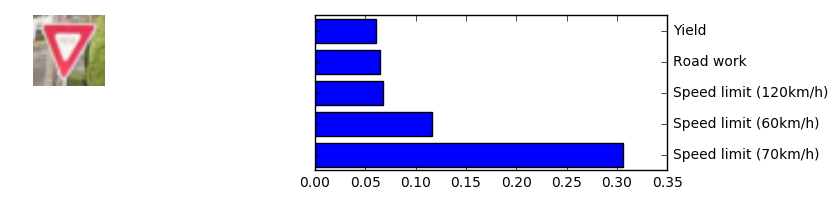

---------------------------------------------------------------------------------------------------



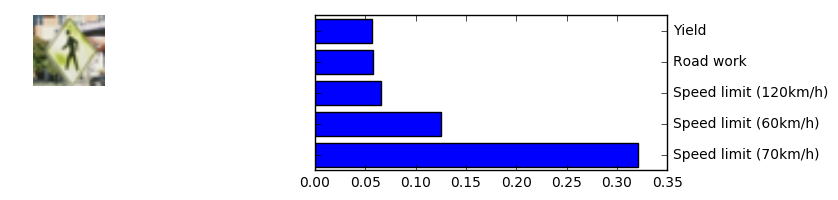

---------------------------------------------------------------------------------------------------



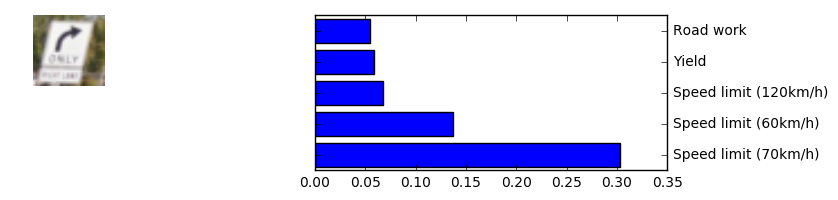

---------------------------------------------------------------------------------------------------



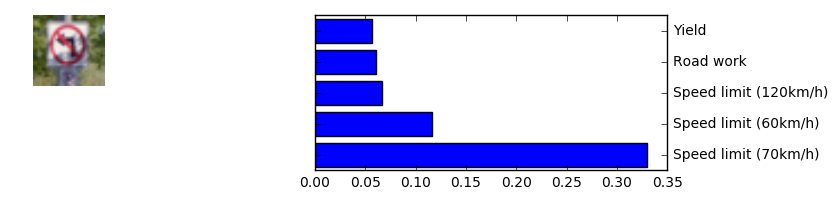

---------------------------------------------------------------------------------------------------



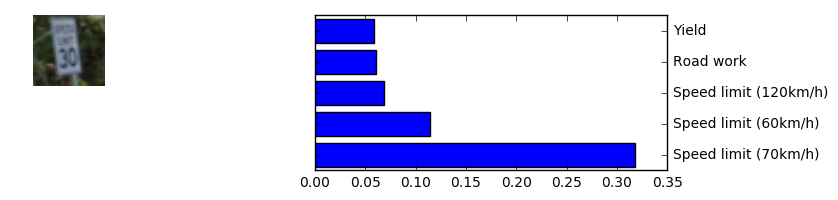

---------------------------------------------------------------------------------------------------



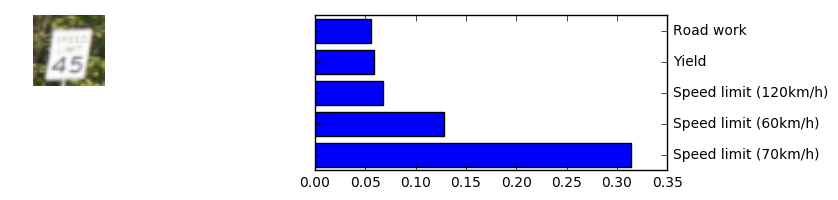

---------------------------------------------------------------------------------------------------



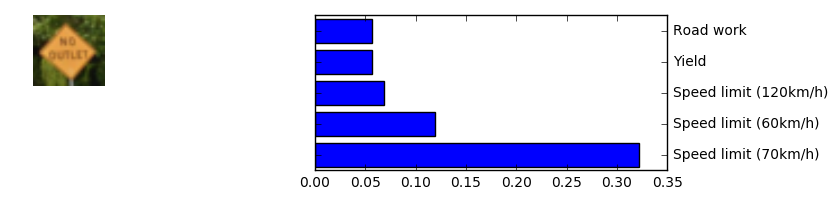

---------------------------------------------------------------------------------------------------



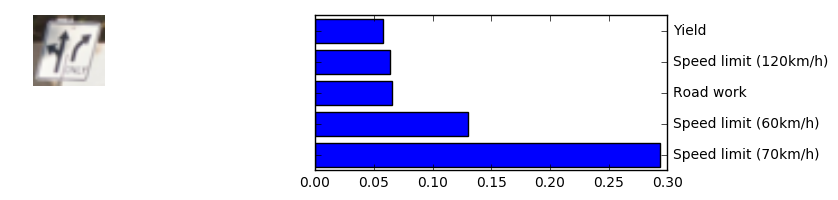

---------------------------------------------------------------------------------------------------



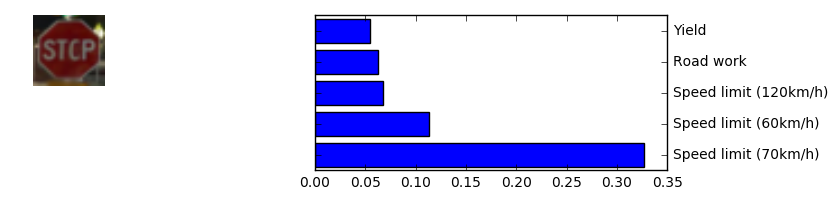

---------------------------------------------------------------------------------------------------



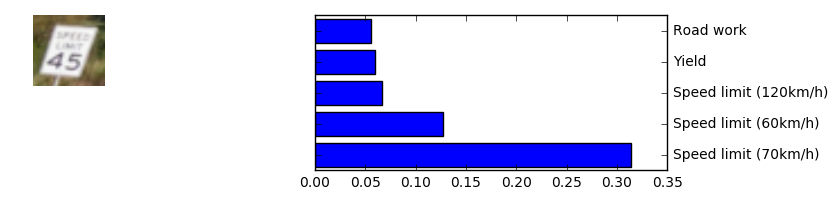

---------------------------------------------------------------------------------------------------



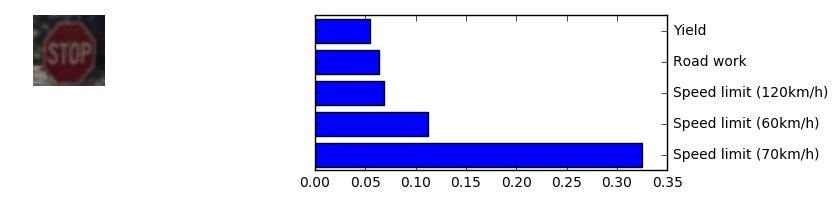

---------------------------------------------------------------------------------------------------



In [90]:
import matplotlib.gridspec as gridspec

for i in range(exampleimages.shape[0]):
    # Prepare original and preprocessed images
    # Prepare the grid
    plt.figure(figsize = (10, 2))
    gridspec.GridSpec(2, 2)
    
    # Plot original image
    plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
    plt.imshow(orignalexamples[i])
    plt.axis('off')

    # Plot predictions
    plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
    plt.barh(np.arange(5)+.5, examples_predictions[0][i], align='center')
    plt.yticks(np.arange(5)+.5, signnames[examples_predictions[1][i].astype(int)])
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='on')
    
    plt.show()
    print("---------------------------------------------------------------------------------------------------\n")




### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
Unfortunately the model doesn't perform as well on the captured images. The top-5 accuracy is about 25%. The accuracy on the test set is 97%. 

The reasons for the bad accuracy could be:

    - Quality of the images. I captured the images from Google Street View. The quality is not great.
    - The road signs have new features that were not in the training data. This is possible because the training data was from German road signs. The examples are from US.
    - The network has overfitted the training data. Creating a road sign classifier that works across the world is going to be challenging because the shape, the words, the pictures all vary from country to country.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The softmax probabilities are visualized above! The model seems to be about 30% certain that all the example images are speed limit signs.

This shows that the example images are very different from the training/test sets. This is because the example images are from US but the training images are from Germany.

This is going to be a challenge in building self-driving cars. We expect our self-driving cars to function independent of the country. For example, while driving from US to Canada/Mexico, or between countries in Europe, we want our cars to function seamlessly.

One approach to solve this is to build an exhaustive training set with data from all the countries.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.